In [155]:
import numpy as np

import pandas
from sklearn import preprocessing
import numpy as np
# load dataset
dataframe = pandas.read_csv('BDDO.csv',error_bad_lines=False , index_col=False, encoding='iso-8859-1')
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:6]
Y = dataset[:,7:8]

Y=Y/np.max(Y)
X = preprocessing.normalize(X)

t=np.concatenate((X,Y), axis=1)
import csv

with open('MVT.csv','w',newline='') as f:  #Ouverture du fichier CSV en écriture
    ecrire=csv.writer(f) # préparation à l'écriture
    A=['holiday','temp_normalisé','rain_1h_normalisé','snow_1h','coulds_all_normalisé','weather_main','traffic_volume'
]
    ecrire.writerow(A)
    for i in t:                           # Pour chaque ligne du tableau...  
        ecrire.writerow(i)                # Mettre dans la variable ecrire cette nouvelle ligne      
print('',end='\n')
print('longueur du tableau : ',len(t))


longueur du tableau :  48204


In [2]:
! pip install tensorflow


Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_325 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_326 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_327 (Dense)            (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


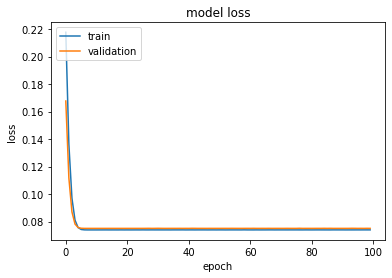

X=[0.         0.95353595 0.00100203 0.         0.30061032 0.02004069], Predicted=[0.450034]


In [170]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
# Importing the dataset
dataframe  = pandas.read_csv('MVT.csv',error_bad_lines=False, index_col=False, encoding='iso-8859-1')
dataset = dataframe.values
   
X = dataset[:,0:6]
y = dataset[:, -1]
y=np.reshape(y, (-1,1))





#Deviding the data set 
from sklearn.model_selection import train_test_split

# traning 60%, validation 20% and test 20%
X_train,  X_test, y_train, y_test = train_test_split(X, y,test_size= 0.8,  random_state=1) 


# Initialising the ANN


model = Sequential()
model.add(Dense(12, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# Fitting the ANN to the Training set

history = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=0,validation_split=0.2)

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred=model.predict(X_test)

print("X=%s, Predicted=%s" % (X_test[0], y_pred[0]))
